<a href="https://colab.research.google.com/github/Shuvamjoy34/Multi-Class-Image-Classification-using-CNN-and-ANN/blob/main/ANN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bike vs Car vs Random Image Classification using Python,Keras and Artificial Neural Network**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, AveragePooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import tensorflow as tf

**Connecting Google Colab with Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Importing the image dataset from google drive and resizing and labelling those images**

In [ ]:
data=[]
labels=[]
car=os.listdir("/content/drive/My Drive/Images/car/")
for a in car:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/car/"+a)
        size_image = cv2.resize(image,(128,128)).flatten()
        data.append(np.array(size_image))
        labels.append('car')
    except AttributeError:
        print("")

bike=os.listdir("/content/drive/My Drive/Images/bike/")
for b in bike:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/bike/"+b)
        size_image = cv2.resize(image,(128,128)).flatten()
        data.append(np.array(size_image))
        labels.append('bike')
    except AttributeError:
        print("")
other=os.listdir("/content/drive/My Drive/Images/random/")
for c in other:
    try:
        image=cv2.imread("/content/drive/My Drive/Images/random/"+c)
        size_image = cv2.resize(image,(128,128)).flatten()
        data.append(np.array(size_image))
        labels.append('others')
    except AttributeError:
        print("")

In [ ]:
images=np.array(data)
labels=np.array(labels)

In [ ]:
images =images.astype(np.float32)
images = images/255

train_x , x , train_y , y = train_test_split(images , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.75 , 
                                                    random_state = 111)



In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)
eval_y = lb.transform(eval_y)


In [ ]:
from tensorflow.python.keras import regularizers
from keras.layers.normalization import BatchNormalization


In [ ]:
!pip install tf-nightly

**Optimal Hyper Parameter Search Using Random Search Hyperparameter Optimisation**

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(dropout_rate_opts,learn_rate,momentum,optimizers="adam"):

#BasicNNet
    model = Sequential()   
    model.add(Dense(512, input_shape=(49152,), activation="relu"))
#keras.layers.BatchNormalization()             
    model.add(Dense(256, activation="relu",kernel_regularizer=regularizers.l2(0.001))) 
#keras.layers.BatchNormalization()
    model.add(Dropout(dropout_rate_opts)) 
    model.add(Dense(128, activation="relu"))  
#keras.layers.BatchNormalization()  
    model.add(Dropout(dropout_rate_opts)) 
    model.add(Dense(64, activation="relu"))  
#keras.layers.BatchNormalization()  
    model.add(Dropout(dropout_rate_opts)) 
    model.add(Dense(32, activation="relu"))
#keras.layers.BatchNormalization()
    model.add(Dropout(dropout_rate_opts)) 
    model.add(Dense(16, activation="relu"))
#keras.layers.BatchNormalization()
    model.add(Dropout(dropout_rate_opts))          
    model.add(Dense(len(lb.classes_), activation="softmax"))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

    return model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

_optimizers=['sgd', 'adam']
dropout_rate_opts  = [0,  0.2, 0.3, 0.5]
_batch_size=[16,32,64]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

params=dict(optimizer=_optimizers,
            batch_size=_batch_size,
            dropout_rate_opts=dropout_rate_opts,
            learn_rate=learn_rate,
            momentum=momentum
            )
print(params)

{'optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64], 'dropout_rate_opts': [0, 0.2, 0.3, 0.5], 'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]}


In [ ]:
model = KerasClassifier(build_fn=create_model,epochs=50,batch_size=16)
model

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3,   n_iter=10)
rscv_results = rscv.fit(x,y)
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_378 (Dense)            (None, 512)               25166336  
_________________________________________________________________
dense_379 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_252 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_380 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_253 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_381 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_254 (Dropout)        (None, 64)              

**Basic Artificial Neural Network Architecture Building**

In [ ]:
model = Sequential()   
model.add(Dense(96, input_shape=(49152,), activation="relu"))
keras.layers.BatchNormalization()             
model.add(Dense(64, activation="relu",kernel_regularizer=regularizers.l2(0.001))) 
keras.layers.BatchNormalization()
model.add(Dropout(0.2)) 
model.add(Dense(32, activation="relu"))  
keras.layers.BatchNormalization()  
model.add(Dropout(0.2)) 
#model.add(Dense(128, activation="relu"))  
#keras.layers.BatchNormalization()  
#model.add(Dropout(0.2)) 
#model.add(Dense(64, activation="relu"))
#keras.layers.BatchNormalization()
#model.add(Dropout(0.2))      
#model.add(Dense(32, activation="relu"))  
#keras.layers.BatchNormalization()  
#model.add(Dropout(0.2))      
model.add(Dense(len(lb.classes_), activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                4718688   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6208      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 4,727,075
Trainable params: 4,727,075
Non-trainable params: 0
______________________________________________

**ANN Model fitting & Evaluating of test dataset**

In [ ]:
from keras.optimizers import Adam
#opt = Adam(lr=0.001)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("ANN_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

history=model.fit(train_x,train_y,batch_size =40,epochs=70,verbose=1,validation_data=(eval_x, eval_y),callbacks=[checkpoint,early],shuffle=True)
history

Epoch 1/70
1/2 [==============>...............] - ETA: 0s - loss: 1.1873 - accuracy: 0.5000
Epoch 00001: val_accuracy improved from -inf to 0.40000, saving model to ANN_1.h5
2/2 [==============================] - 0s 162ms/step - loss: 6.5454 - accuracy: 0.4875 - val_loss: 4.9380 - val_accuracy: 0.4000
Epoch 2/70
1/2 [==============>...............] - ETA: 0s - loss: 4.8488 - accuracy: 0.4500
Epoch 00002: val_accuracy improved from 0.40000 to 0.60000, saving model to ANN_1.h5
2/2 [==============================] - 1s 535ms/step - loss: 5.1209 - accuracy: 0.4375 - val_loss: 4.5424 - val_accuracy: 0.6000
Epoch 3/70
1/2 [==============>...............] - ETA: 0s - loss: 10.8663 - accuracy: 0.3250
Epoch 00003: val_accuracy did not improve from 0.60000
2/2 [==============================] - 0s 29ms/step - loss: 8.3055 - accuracy: 0.4000 - val_loss: 8.1127 - val_accuracy: 0.4000
Epoch 4/70
1/2 [==============>...............] - ETA: 0s - loss: 6.7876 - accuracy: 0.4750
Epoch 00004: val_accura

**ANN mdel accuracy & loss visualtion on Train & Validation dataset**

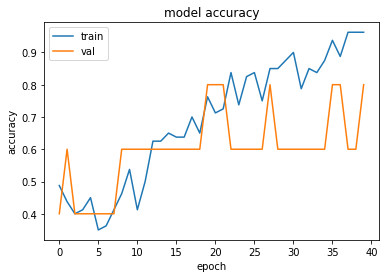

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**As we can see the ANN model is little overfiiting on validation dataset. So, to perform a better architecture on Image Dataset I have introduced Convolutional Neural Network in my next colab notebook**

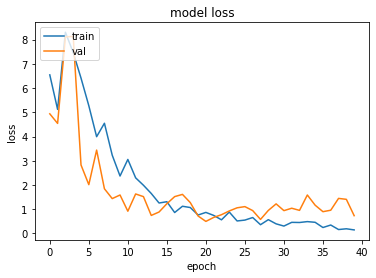

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Evaluation of ANN model on test dataset**

In [ ]:
# Evaluating the model for convnet
score = model.evaluate(test_x, test_y, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.9325188398361206
Test accuracy: 0.800000011920929


**Multi-Class Confusion Matrix for Car,Bike and Random Images after running ANN model**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0(car)', 'class 1(bike)','class 2(random)']
                                               
print(classification_report(np.argmax(test_y,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(test_y,axis=1), y_pred))

                 precision    recall  f1-score   support

   class 0(car)       0.50      1.00      0.67         2
  class 1(bike)       0.80      1.00      0.89         4
class 2(random)       1.00      0.67      0.80         9

       accuracy                           0.80        15
      macro avg       0.77      0.89      0.79        15
   weighted avg       0.88      0.80      0.81        15

[[2 0 0]
 [0 4 0]
 [2 1 6]]
